<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/ANN_basic(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [294]:
# import some basic libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [295]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [296]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [297]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [298]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [299]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [300]:
geography = pd.get_dummies(dataset['Geography'], drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [301]:
gender = pd.get_dummies(dataset['Gender'], drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [302]:
# one hot encoding for geography and gender column

dataset = dataset.drop(columns=['Geography', 'Gender'])
dataset = pd.concat([geography, gender, dataset], axis=1)

In [303]:
dataset.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


Train Test Split

In [304]:
x = dataset.drop(columns=['Exited'], axis=1)
y = dataset['Exited']

In [305]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2, test_size=0.2)

Standarization of data

There is a reason why we only apply fit-transform on training data and only transform on test data

What fit-transform does is, it fits the dataset according to the dataset by learning about its mean, std deviation and other features which is used to later transform the dataset according to it.

If I apply fit-transform to the dataset without splitting it first, i.e., to training and testing dataset both, then the model also learns about the testing dataset which should never be the case, your test datatset should be completely new to your model, therefore we only transform it according to the fit we learned from the training data. 



In [306]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Creating ANN

In [307]:
# importing the dependencies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [308]:
# initializing the ANN

model = Sequential()  

In [309]:
# adding the input layer

model.add(Dense(units=11, activation='relu')) # the first layer we add 11 neurons in input layer as we have 11 different input categories

In [310]:
# adding the first hidden layer

model.add(Dense(units=16, activation='relu'))
#model.add(Dropout(0.3))

In [311]:
# adding the second hidden layer

model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.175)) # prevents overfitting by deactivating the neurans while training 

In [312]:
# adding the third hidden layer

model.add(Dense(units=4, activation='relu'))

In [313]:
# adding the output layer

model.add(Dense(units=1, activation='sigmoid'))

In [314]:
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [315]:
# early stopping using callback

import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [316]:
history = model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=15,callbacks=early_stopping)

Epoch 1/15
536/536 [==============================] - 3s 3ms/step - loss: 0.5810 - accuracy: 0.7604 - val_loss: 0.4967 - val_accuracy: 0.8012
Epoch 2/15
536/536 [==============================] - 2s 3ms/step - loss: 0.5053 - accuracy: 0.7951 - val_loss: 0.4541 - val_accuracy: 0.8103
Epoch 3/15
536/536 [==============================] - 2s 4ms/step - loss: 0.4752 - accuracy: 0.8022 - val_loss: 0.4342 - val_accuracy: 0.8186
Epoch 4/15
536/536 [==============================] - 2s 3ms/step - loss: 0.4577 - accuracy: 0.8059 - val_loss: 0.4200 - val_accuracy: 0.8262
Epoch 5/15
536/536 [==============================] - 2s 3ms/step - loss: 0.4502 - accuracy: 0.8097 - val_loss: 0.4119 - val_accuracy: 0.8289
Epoch 6/15
536/536 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8127 - val_loss: 0.4038 - val_accuracy: 0.8311
Epoch 7/15
536/536 [==============================] - 2s 3ms/step - loss: 0.4321 - accuracy: 0.8153 - val_loss: 0.3984 - val_accuracy: 0.8342
Epoch 

In [317]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

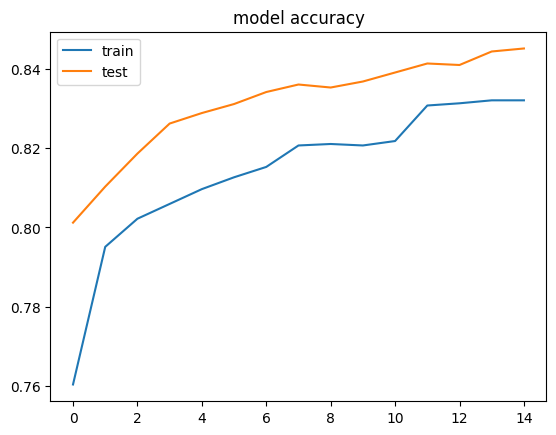

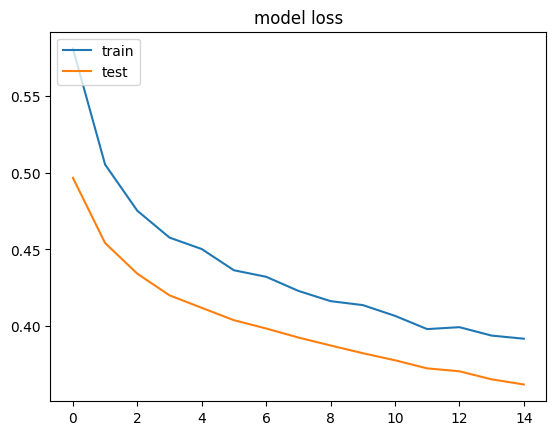

In [318]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting with test data

In [319]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8490


[0.3864319622516632, 0.8489999771118164]

In [320]:
test_predictions = model.predict(x_test)
test_predictions = (test_predictions >= 0.5) # if greater than 0.5 then 1 else 0

63/63 [==============================] - 0s 1ms/step


In [321]:
# get the weights

model.get_weights()

[array([[ 0.56057537,  0.17756729,  0.5673348 ,  0.1704637 ,  0.09316446,
          0.05994868,  0.04873223,  0.2940573 , -0.08361022,  0.00155694,
          0.48884785],
        [-0.12993091, -0.2277342 ,  0.11863126,  0.2982991 , -0.49297863,
          0.46496463, -0.01178651, -0.4532764 ,  0.14780661,  0.08859988,
         -0.23178214],
        [ 0.00812423,  0.60652715, -0.18794154,  0.19211943,  0.40822482,
          0.42629752, -0.34428412,  0.15867043,  0.08153773, -0.23122004,
         -0.01618277],
        [-0.09644229,  0.3642959 ,  0.23888499, -0.18601029, -0.07977388,
         -0.07287804,  0.13561784,  0.12516326,  0.2311937 ,  0.39205965,
         -0.26225582],
        [ 0.22230281, -0.45479107, -0.09789365,  0.45699275, -0.6727823 ,
         -0.02552175, -0.611414  ,  0.12101344,  0.41891944, -0.62758607,
          0.55015486],
        [ 0.08165873,  0.08099794,  0.49555153, -0.25587073, -0.02262056,
          0.46381345,  0.30709863,  0.16280854, -0.22501557, -0.2514279